#Text Summarization
The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. But you can leverage the seq2seq models you learnt in language translation on an appropriate dataset to build deep learning based abstractive summarizers


#Extraction based techniques


In [ ]:
import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [ ]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [ ]:
import re
DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT) #Combining all the paragraphs
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [ ]:
print(DOCUMENT)

The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion. The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim. Over the course of the game, the player completes quests and develops the character by improving skills. The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely. The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, which game director and executive producer Todd Howard considered less interesting by comparison.

Sentences Collection

In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
print(sentences)
print("No. of sentences:",len(sentences))

['The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks.', 'It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion.', "The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.", 'The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.', 'Over the course of the game, the player completes quests and develops the character by improving skills.', 'The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely.', "The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, which game director and executive producer Todd Howard considered less intere

## Basic Text pre-processing

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

# Handeling 'not' words from stop_words
def handleStops(stop_words):
  rm = ['not', 'no', 'nor', 'against']

  for i in stop_words:
    if "n'" in i:
      rm.append(i)

  for i in rm:
    stop_words.remove(i)
  return stop_words

stop_words = handleStops(stop_words)

In [ ]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document) #Function Def Vectorize
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks',
       'fifth main installment elder scrolls series following elder scrolls iv oblivion',
       'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'],
      dtype='<U183')

## *1. UNI-GRAM*

In [ ]:
# Creation of Unigarms
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range =(1, 1))
X1 = vectorizer.fit_transform(norm_sentences)
unigrams = (vectorizer.get_feature_names())
print(unigrams)
print(len(unigrams))

['ability', 'absorb', 'acclaim', 'action', 'advancement', 'akatosh', 'alduin', 'allowing', 'allows', 'although', 'amid', 'among', 'antagonist', 'anthropomorphic', 'anywhere', 'appearance', 'areas', 'around', 'assassins', 'associated', 'attack', 'attacks', 'band', 'beginning', 'bethesda', 'black', 'born', 'brawl', 'brotherhood', 'called', 'cat', 'certain', 'character', 'characters', 'choose', 'choosing', 'cities', 'city', 'civil', 'combat', 'comparison', 'completed', 'completes', 'considered', 'consisting', 'consume', 'continent', 'continues', 'conversation', 'course', 'create', 'created', 'creatures', 'critical', 'customizing', 'cyrodiil', 'damage', 'dark', 'death', 'defeat', 'depleted', 'destroy', 'determines', 'develop', 'developed', 'develops', 'direct', 'director', 'discovered', 'diverse', 'divided', 'dragon', 'dragonborn', 'dragons', 'dungeons', 'effectiveness', 'eighteen', 'either', 'elder', 'eligible', 'elves', 'empire', 'engage', 'enough', 'entry', 'environment', 'evenly', 'eve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###TF

In [ ]:
print("Norm Sentences:", norm_sentences)
print("Len of Norm Sentences:", len(norm_sentences))

Norm Sentences: ['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks'
 'fifth main installment elder scrolls series following elder scrolls iv oblivion'
 'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'
 'game set years events oblivion takes place fictional province skyrim'
 'course game player completes quests develops character improving skills'
 'game continues openworld tradition predecessors allowing player travel anywhere game world time ignore postpone main storyline indefinitely'
 'team opted unique diverse open world oblivions imperial province cyrodiil game director executive producer todd howard considered less interesting comparison'
 'game released critical acclaim reviewers particularly mentioning character advancement setting considered one greatest video games time'
 'elder scrolls v skyrim action roleplaying game playable either first thirdp

In [ ]:
def computeTF(doc):
  valTF = []
  for each in doc:
    wordDict = dict.fromkeys(unigrams, 0)
    sentence = each.split(" ")

    for word in sentence:
      if len(word) == 1:
        sentence.remove(word)

    for word in sentence:
      wordDict[word]+=1

    res = []
    for i in wordDict:
      comp = float(wordDict[i] / len(each))
      res.append(round(comp, 4))
    
    valTF.append(res)
  return(valTF)
    
TF = computeTF(norm_sentences)

In [ ]:
TF = np.array(TF)
TF = TF.T
type(TF)

numpy.ndarray

In [ ]:
df = pd.DataFrame(TF, index=unigrams)
df.sort_index(ascending=True).head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
absorb,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0111,0.0,0.000,0.0,0.0,0.0000,0.0000
acclaim,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0074,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
action,0.0088,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0109,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
advancement,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0074,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
akatosh,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0119
alduin,0.0000,0.0,0.0088,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0125,0.0119
allowing,0.0000,0.0,0.0000,0.0,0.0,0.0072,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
allows,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0000
although,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0,0.012,0.0,0.0,0.0000,0.0000


###DF (Document Frequency/Term Presence)

In [ ]:
DF = vectorizer.fit_transform(norm_sentences)
DF = DF.toarray()
DF = DF.T
DF

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df = pd.DataFrame(DF, index=unigrams)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absorb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
acclaim,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
action,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
advancement,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wilderness,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
world,0,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
worldeater,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()
dt_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18074668, 0.30828241,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19328565, 0.        ,
        0.        ]])

In [ ]:
td_matrix = dt_matrix.T #Transpose Matrix
td_matrix
print(td_matrix.shape)

(271, 35)


In [ ]:
pd.DataFrame(np.round(td_matrix, 2), index=unigrams)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
absorb,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.31,0.0,0.00,0.0,0.0,0.0,0.00
acclaim,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.28,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
action,0.25,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.32,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
advancement,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.28,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ways,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
wilderness,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.24,...,0.37,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
world,0.00,0.0,0.18,0.00,0.0,0.16,0.14,0.00,0.00,0.16,...,0.00,0.19,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.19
worldeater,0.00,0.0,0.31,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00


## *2. BI-GRAM* 

In [ ]:
# Forming Bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2,2))
bigrams_matrix = vectorizer.fit_transform(norm_sentences) 
bigrams = (vectorizer.get_feature_names())
print(bigrams)

['ability certain', 'absorb souls', 'acclaim reviewers', 'action roleplaying', 'advancement setting', 'akatosh one', 'alduin first', 'alduin large', 'alduin worldeater', 'allowing player', 'allows warp', 'although not', 'amid civil', 'among three', 'anthropomorphic cat', 'anywhere game', 'around player', 'around years', 'associated quest', 'attack cities', 'attacks struck', 'band assassins', 'beginning game', 'bethesda game', 'bethesda softworks', 'black dragon', 'born soul', 'brotherhood band', 'called dragon', 'cat lizardlike', 'certain areas', 'certain poisons', 'character absorb', 'character advancement', 'character dragonborn', 'character improving', 'character levels', 'character selecting', 'characters appearance', 'characters npcs', 'characters quest', 'characters skills', 'choose join', 'choosing one', 'cities towns', 'city town', 'civil war', 'combat depleted', 'combat magic', 'combat npcs', 'completed ignored', 'completes quests', 'considered less', 'considered one', 'consis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### TF-IDF

In [ ]:
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
bigram_matrix = vectorizer.fit_transform(norm_sentences)
bigram_matrix = bigram_matrix.toarray()
bigram_matrix = bigram_matrix.T
print("\n\nScores : \n", bigram_matrix)



Scores : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.27111489 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
pd.DataFrame(np.round(bigram_matrix, 2), index=bigrams)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability certain,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
absorb souls,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.29,0.0,0.00,0.0,0.0,0.0,0.0
acclaim reviewers,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.26,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
action roleplaying,0.26,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.3,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
advancement setting,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.26,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world oblivions,0.00,0.0,0.00,0.00,0.0,0.00,0.23,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
world quickly,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
world time,0.00,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
worldeater dragon,0.00,0.0,0.27,0.00,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0


## *3. TRI-GRAMS*

In [ ]:
# Forming Trigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (3,3))
trigrams_matrix = vectorizer.fit_transform(norm_sentences) 
trigrams = (vectorizer.get_feature_names())
print(trigrams)

['ability certain areas', 'absorb souls dragons', 'acclaim reviewers particularly', 'action roleplaying game', 'action roleplaying video', 'advancement setting considered', 'akatosh one series', 'alduin first dragon', 'alduin large black', 'alduin worldeater dragon', 'allowing player travel', 'allows warp previously', 'although not direct', 'amid civil war', 'among three schools', 'anthropomorphic cat lizardlike', 'anywhere game world', 'around player characters', 'around years events', 'associated quest path', 'attack cities towns', 'attacks struck frostbased', 'beginning game players', 'bethesda game studios', 'black dragon returns', 'born soul power', 'brotherhood band assassins', 'called dragon shouts', 'cat lizardlike creatures', 'certain poisons struck', 'character absorb souls', 'character advancement setting', 'character dragonborn mortal', 'character improving skills', 'character selecting sex', 'characters npcs populate', 'characters quest defeat', 'characters skills numerica

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### TF-IDF

In [ ]:
# Applying TFIDF
vectorizer = TfidfVectorizer(ngram_range = (3, 3))
trigrams_matrix = vectorizer.fit_transform(norm_sentences)
trigrams_matrix = trigrams_matrix.toarray()
trigrams_matrix = trigrams_matrix.T
print("\n\nScores : \n", trigrams_matrix)



Scores : 
 [[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.2773501 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [ ]:
pd.DataFrame(np.round(trigrams_matrix, 2), index=trigrams)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
ability certain areas,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
absorb souls dragons,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.3,0.0,0.00,0.0,0.0,0.0,0.0
acclaim reviewers particularly,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.27,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
action roleplaying game,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.34,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
action roleplaying video,0.3,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world quickly riding,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
world time ignore,0.0,0.0,0.00,0.00,0.0,0.26,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
worldeater dragon prophesied,0.0,0.0,0.28,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
years events elder,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.31,0.0,0.0,0.0,0.0


## *N-Gram*

### HardCoded N-gram

In [ ]:
def generate_ngrams(inDocs, n):
  res = []
  for doc in inDocs:
    tokens = [token for token in doc.split(" ") if token != ""]
    ngrams = zip(*[tokens[i:] for i in range(n)])
    sen =  [" ".join(ngram) for ngram in ngrams]
    res.extend(sen)
  return(res)

x = generate_ngrams(norm_sentences, 5)

In [ ]:
len(x)

284

### N-Gram from module

In [ ]:
# Forming ngrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (5,5))
ngrams_matrix = vectorizer.fit_transform(norm_sentences) 
ngrams = (vectorizer.get_feature_names())
print(ngrams)

['absorb souls dragons order use', 'acclaim reviewers particularly mentioning character', 'action roleplaying game playable either', 'action roleplaying video game developed', 'advancement setting considered one greatest', 'akatosh one series gods prophesied', 'alduin first dragon created akatosh', 'alduin large black dragon returns', 'alduin worldeater dragon prophesied destroy', 'allowing player travel anywhere game', 'allows warp previously discovered locations', 'amid civil war two factions', 'among three schools combat magic', 'anthropomorphic cat lizardlike creatures customizing', 'anywhere game world time ignore', 'around player characters quest defeat', 'around years events elder scrolls', 'beginning game players create character', 'bethesda game studios published bethesda', 'black dragon returns land lost', 'cat lizardlike creatures customizing characters', 'certain poisons struck lightningbased attacks', 'character absorb souls dragons order', 'character advancement setting c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### TF-IDF N-Gram

In [ ]:
# Applying TF - IDF
vectorizer = TfidfVectorizer(ngram_range = (5, 5))
ngrams_matrix = vectorizer.fit_transform(norm_sentences)
ngrams_matrix = ngrams_matrix.toarray()
ngrams_matrix = ngrams_matrix.T
print("\n\nScores : \n", trigrams_matrix)



Scores : 
 [[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.2773501 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [ ]:
pd.DataFrame(np.round(ngrams_matrix, 3), index=ngrams)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
absorb souls dragons order use,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.333,0.0,0.000,0.0,0.0,0.0,0.0
acclaim reviewers particularly mentioning character,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.289,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
action roleplaying game playable either,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.383,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
action roleplaying video game developed,0.319,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
advancement setting considered one greatest,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.289,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world quickly riding horses utilizing,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
world time ignore postpone main,0.000,0.0,0.000,0.000,0.0,0.277,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
worldeater dragon prophesied destroy world,0.000,0.0,0.302,0.000,0.0,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0
years events elder scrolls iv,0.000,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.333,0.0,0.0,0.0,0.0


# Bag of Words Model

In [ ]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
df_imdb = pd.read_csv("https://raw.githubusercontent.com/kosuridivesh/NLP-TheProject/main/Dataset/imdb_labelled.txt?token=GHSAT0AAAAAABVDXGINWVO6WKZULVLS4EUSYVFTC4A", delimiter='\t', header=None)
df_imdb.columns = ["Review_text", "Review_class"]
# https://raw.githubusercontent.com/kosuridivesh/NLP-TheProject/main/Dataset/imdb_labelled.txt?token=GHSAT0AAAAAABVDXGINWVO6WKZULVLS4EUSYVFTC4A

df_amazon = pd.read_csv("https://raw.githubusercontent.com/kosuridivesh/NLP-TheProject/main/Dataset/amazon_cells_labelled.txt?token=GHSAT0AAAAAABV7OSNYK5FYW4AFHPTIBS5CYV775VQ", delimiter='\t', header=None)
df_amazon.columns = ["Review_text", "Review_class"]
# https://raw.githubusercontent.com/kosuridivesh/NLP-TheProject/main/Dataset/amazon_cells_labelled.txt?token=GHSAT0AAAAAABVDXGINROLQOI4BWMGUJLKMYVFTCEQ
df = pd.concat([df_imdb, df_amazon])
df

HTTPError: ignored

In [ ]:
def clean_text(df):
    df_reviews = list()
    lines = df["Review_text"].values.tolist()
    for text in lines:
        text = text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        PS = PorterStemmer()
        words = [PS.stem(w) for w in words if not w in stop_words]
        words = ' '.join(words)
        df_reviews.append(words)
    return df_reviews

df_reviews = clean_text(df)
df_reviews[0:20]

In [ ]:
len(stop_words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(min_df=3)   
X = CV.fit_transform(df_reviews).toarray()
y = df["Review_class"].to_numpy()
print(np.shape(X))
print(np.shape(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion="entropy", random_state=41)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

# Word2Vec

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

## Vector representation of a word

In [ ]:
x = word2vec_model["beautiful"]
len(x)

In [ ]:
x

## Word vectors understand the meanings of words

In [ ]:
word2vec_model.most_similar("girl")

## Testing: 'queen - girl + boy = king'

In [ ]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

In [ ]:
word2vec_model.most_similar("queen") #hardcode

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

most_sililar: Numeric solving
dicts: wordnet, senti-wordnet
Go to the word2vec, calc of functions
tsne_model
structured from unstructured review: W2V
--------------
Word2Vec Maths: CBOW, Skipgram


# CBOW

In [ ]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

### Cleaning data

In [ ]:
import re
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

In [ ]:
words = sentences.split()
vocab = set(words)

In [ ]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

### Dictionaries

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

### Data bags

In [ ]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

### Embeddings

In [ ]:
import numpy as np
embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings)

[[2.31119628e-01 5.13630727e-01 9.02310091e-01 4.93312834e-01
  6.22714466e-01 9.58191561e-01 2.27392623e-01 6.05552001e-01
  8.22078953e-01 4.61575994e-01]
 [3.69747917e-01 1.15008186e-01 5.28889552e-01 2.54125785e-01
  7.01885868e-01 9.25482322e-01 8.86224100e-01 4.66477770e-01
  8.64292499e-01 8.04060259e-01]
 [9.54809308e-01 6.91156693e-01 3.34297939e-01 8.46166863e-01
  5.05486985e-01 3.05712907e-01 2.47826809e-02 2.08089600e-01
  9.07717769e-01 3.80005868e-01]
 [9.61616884e-01 6.37882571e-01 6.19232006e-01 6.46722775e-01
  8.93273162e-01 4.46642401e-01 5.89942603e-01 4.55498882e-01
  7.22482941e-02 7.42702234e-01]
 [9.59272849e-01 6.78247692e-01 8.05207475e-01 9.24160601e-02
  5.80237313e-01 7.48791646e-01 8.51043562e-01 7.14406037e-01
  8.30480111e-01 9.74657353e-02]
 [4.92752933e-04 2.58800912e-01 8.20080199e-01 8.47268004e-01
  3.44556800e-01 1.91644727e-01 6.39899153e-01 6.87352039e-01
  1.58642343e-01 9.04763728e-01]
 [7.83691376e-03 1.45876935e-01 5.27365712e-01 1.08575275e

### Linear model

In [ ]:
def linear(m, theta):
    w = theta
    return m.dot(w)

### Log softmax + NLLloss = Cross Entropy

In [ ]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [ ]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [ ]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

### Forward function

In [ ]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

### Backward function

In [ ]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

### Optimize function

In [ ]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

### Training

In [ ]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

### Analyze

Text(0, 0.5, 'Losses')

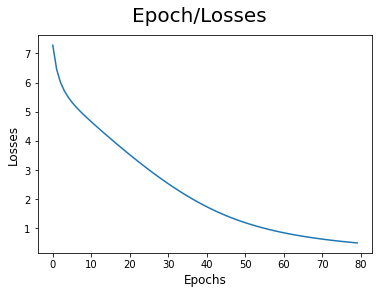

In [ ]:
# Plot loss/epoch
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

### Predict function

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [ ]:
predict(['we', 'are', 'to', 'study'])

### Accuracy

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [ ]:
accuracy()

#SkipGram

In [ ]:
from nltk.corpus import gutenberg # to get bible corpus
from string import punctuation # to remove punctuation from corpus
import nltk 
import numpy as np
from keras.preprocessing import text
from keras.preprocessing.sequence import skipgrams 
from keras.layers import *
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model,Sequential 

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
norm_bible

In [ ]:
print(bible)

In [ ]:
bible = gutenberg.sents("bible-kjv.txt")
remove_terms = punctuation + '0123456789'
wpt = nltk.WordPunctTokenizer()
def normalize_document(doc):
  # lower case and remove special characters\whitespaces
  doc = re.sub(r'[^a-zA-Z\s]', '', doc,re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = wpt.tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc
normalize_corpus = np.vectorize(normalize_document)

In [ ]:
import re
norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id) + 1
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:5])

In [ ]:
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]
 # view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i])) 

In [ ]:
embed_size = 100
word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size, )))
context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))
merged_output = add([word_model.output, context_model.output])  
model_combined = Sequential()
model_combined.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
final_model = Model([word_model.input, context_model.input], model_combined(merged_output))
final_model.compile(loss="mean_squared_error", optimizer="rmsprop")
final_model.summary()
# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(final_model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [ ]:
for epoch in range(1, 3):
     loss = 0
     for i, elem in enumerate(skip_grams):
         pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
         pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
         labels = np.array(elem[1], dtype='int32')
         X = [pair_first_elem, pair_second_elem]
         Y = labels
         if i % 10000 == 0:
             print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
         loss += final_model.train_on_batch(X,Y)  
     print('Epoch:', epoch, 'Loss:', loss) 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
word_embed_layer = word_model.layers[0]
weights = word_embed_layer.get_weights()[0][1:]
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['god', 'jesus','egypt', 'john', 'famine']}
similar_words 

(12424, 12424)


{'egypt': ['priests', 'threescore', 'away', 'gates', 'male'],
 'famine': ['basket', 'favoured', 'stolen', 'stars', 'uncover'],
 'god': ['thou', 'upon', 'even', 'day', 'took'],
 'jesus': ['persuaded', 'nay', 'boldly', 'abound', 'suck'],
 'john': ['wrap', 'doubts', 'reapeth', 'whiles', 'compassions']}

#Most Similar
        Find the top-N most similar keys.
        Positive keys contribute positively towards the similarity, negative keys negatively.
        This method computes cosine similarity between a simple mean of the projection
        weight vectors of the given keys and the vectors for each key in the model.
        The method corresponds to the `word-analogy` and `distance` scripts in the original
        word2vec implementation.
        Parameters
        ----------
        positive : list of (str or int or ndarray) or list of ((str,float) or (int,float) or (ndarray,float)), optional
            List of keys that contribute positively. If tuple, second element specifies the weight (default `1.0`)
        negative : list of (str or int or ndarray) or list of ((str,float) or (int,float) or (ndarray,float)), optional
            List of keys that contribute negatively. If tuple, second element specifies the weight (default `-1.0`)
        topn : int or None, optional
            Number of top-N similar keys to return, when `topn` is int. When `topn` is None,
            then similarities for all keys are returned.
        clip_start : int
            Start clipping index.
        clip_end : int
            End clipping index.
        restrict_vocab : int, optional
            Optional integer which limits the range of vectors which
            are searched for most-similar values. For example, restrict_vocab=10000 would
            only check the first 10000 key vectors in the vocabulary order. (This may be
            meaningful if you've sorted the vocabulary by descending frequency.) If
            specified, overrides any values of ``clip_start`` or ``clip_end``.
        Returns
        -------
        list of (str, float) or numpy.array
            When `topn` is int, a sequence of (key, similarity) is returned.
            When `topn` is None, then similarities for all keys are returned as a
            one-dimensional numpy array with the size of the vocabulary.

In [ ]:
    def most_similar(
            self, positive=None, negative=None, topn=10, clip_start=0, clip_end=None,
            restrict_vocab=None, indexer=None,
        ):

        if isinstance(topn, Integral) and topn < 1:
            return []

        # allow passing a single string-key or vector for the positive/negative arguments
        positive = _ensure_list(positive)
        negative = _ensure_list(negative)

        self.fill_norms()
        clip_end = clip_end or len(self.vectors)

        if restrict_vocab:
            clip_start = 0
            clip_end = restrict_vocab

        # add weights for each key, if not already present; default to 1.0 for positive and -1.0 for negative keys
        keys = []
        weight = np.concatenate((np.ones(len(positive)), -1.0 * np.ones(len(negative))))
        for idx, item in enumerate(positive + negative):
            if isinstance(item, _EXTENDED_KEY_TYPES):
                keys.append(item)
            else:
                keys.append(item[0])
                weight[idx] = item[1]

        # compute the weighted average of all keys
        mean = self.get_mean_vector(keys, weight, pre_normalize=True, post_normalize=True, ignore_missing=False)
        all_keys = [
            self.get_index(key) for key in keys if isinstance(key, _KEY_TYPES) and self.has_index_for(key)
        ]

        if indexer is not None and isinstance(topn, int):
            return indexer.most_similar(mean, topn)

        dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]
        if not topn:
            return dists
        best = matutils.argsort(dists, topn=topn + len(all_keys), reverse=True)
        # ignore (don't return) keys from the input
        result = [
            (self.index_to_key[sim + clip_start], float(dists[sim]))
            for sim in best if (sim + clip_start) not in all_keys
        ]
        return result[:topn]